In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
import json
import pandas as pd
import pprint

In [2]:
import numpy as np
from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [3]:
# note : the current databases are built with the following columns 
# ["danceability","energy","loudness","speechiness","acousticness",
#    "instrumentalness","liveness","valence","tempo","id","duration_ms"]
# we could add the mode 

## Clustering

In [4]:
data=pd.read_csv("audio_features.csv", sep=',')
data.drop(columns="Unnamed: 0", inplace=True)
data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.670,0.750,-4.895,0.1730,0.194000,0.000000,0.3690,0.526,77.045,6hZPajczr6rZV0BoiVaL9G,229738
1,0.631,0.743,-4.353,0.0285,0.123000,0.000000,0.1310,0.709,134.961,32s2XKjyXifmlGfU2tkT8y,178187
2,0.395,0.988,-1.936,0.1630,0.000748,0.000536,0.2410,0.327,152.974,7qNC8YKkXrzdKvcpL3xra6,165280
3,0.603,0.457,-5.384,0.2970,0.526000,0.000000,0.0905,0.455,73.724,5IvdLxVB8gwwcgnEkXSSW2,242972
4,0.547,0.758,-4.780,0.0285,0.307000,0.000001,0.1860,0.308,87.928,1iQ1B8aUtGMdsezQhCTgMQ,195960
...,...,...,...,...,...,...,...,...,...,...,...
1086,0.659,0.760,-2.564,0.1510,0.237000,0.000000,0.1480,0.742,119.849,0Yc1PcFl82lC2w3Bu4fXGP,175800
1087,0.616,0.810,-6.190,0.3740,0.090200,0.000000,0.4250,0.703,121.024,1ztFzSOgRMVTMOE8r0Jmlp,176692
1088,0.653,0.835,-5.769,0.2920,0.174000,0.000000,0.3060,0.515,135.041,6CZpEC9kyyCJWWZKPnviXY,233267
1089,0.633,0.813,-5.025,0.1540,0.118000,0.000000,0.1330,0.782,178.097,6L4okhXpRc3yFh5lhGWI9X,154547


In [5]:
data.set_index("id", inplace=True)
data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
6hZPajczr6rZV0BoiVaL9G,0.670,0.750,-4.895,0.1730,0.194000,0.000000,0.3690,0.526,77.045,229738
32s2XKjyXifmlGfU2tkT8y,0.631,0.743,-4.353,0.0285,0.123000,0.000000,0.1310,0.709,134.961,178187
7qNC8YKkXrzdKvcpL3xra6,0.395,0.988,-1.936,0.1630,0.000748,0.000536,0.2410,0.327,152.974,165280
5IvdLxVB8gwwcgnEkXSSW2,0.603,0.457,-5.384,0.2970,0.526000,0.000000,0.0905,0.455,73.724,242972
1iQ1B8aUtGMdsezQhCTgMQ,0.547,0.758,-4.780,0.0285,0.307000,0.000001,0.1860,0.308,87.928,195960
...,...,...,...,...,...,...,...,...,...,...
0Yc1PcFl82lC2w3Bu4fXGP,0.659,0.760,-2.564,0.1510,0.237000,0.000000,0.1480,0.742,119.849,175800
1ztFzSOgRMVTMOE8r0Jmlp,0.616,0.810,-6.190,0.3740,0.090200,0.000000,0.4250,0.703,121.024,176692
6CZpEC9kyyCJWWZKPnviXY,0.653,0.835,-5.769,0.2920,0.174000,0.000000,0.3060,0.515,135.041,233267


In [6]:
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)
# data_norm is an array - eq. to X_normalized 
data_norm

array([[ 0.62162706,  0.35199228,  0.68758062, ...,  0.07576189,
        -1.45445037, -0.09934238],
       [ 0.4081261 ,  0.32418231,  0.79541023, ...,  0.78457574,
         0.47232335, -0.40650055],
       [-0.88382847,  1.29753113,  1.2762666 , ..., -0.69502477,
         1.07158738, -0.48340479],
       ...,
       [ 0.52856254,  0.68968473,  0.51370041, ...,  0.03315559,
         0.47498483, -0.07831542],
       [ 0.41907486,  0.60228197,  0.66171743, ...,  1.06732662,
         1.90738985, -0.54735561],
       [ 1.63986244,  0.12951255,  0.78745232, ..., -0.06755021,
         0.04379286,  0.46342839]])

## Clustering with PCA

In [7]:
pca = PCA(n_components=5)

In [8]:
pca.fit(data_norm)

PCA(n_components=5)

In [9]:
pca.explained_variance_ratio_

array([0.30326692, 0.15582257, 0.11276854, 0.10224745, 0.08625554])

In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.30326692, 0.45908949, 0.57185803, 0.67410549, 0.76036102])

In [11]:
X_pca = pca.transform(data_norm)

## And KMeans

In [12]:
kmeans = KMeans(n_clusters=6, n_init=10)

In [13]:
kmeans.fit(X_pca)
# try with .fit_predict ?

KMeans(n_clusters=6, n_init=10)

In [14]:
kmeans.inertia_

3537.2442352968083

In [15]:
kmeans.cluster_centers_

array([[-0.82491224, -0.63240309,  0.42360663,  0.28741159, -0.21303945],
       [ 0.35636201,  1.90009508, -1.80094028,  0.15848798, -1.52302161],
       [ 1.99992568, -0.97746671,  0.02928545, -0.32574583, -0.33007585],
       [-0.70194341,  1.0344638 ,  0.35332703, -0.4932455 ,  0.26948948],
       [ 5.01344716,  0.97975882,  0.49761442,  0.41063438,  0.55496518],
       [-0.79824506, -0.73138817, -1.92977525,  0.54706741,  1.13568404]])

In [16]:
kmeans.n_iter_

47

In [17]:
kmeans.labels_

array([5, 0, 3, ..., 5, 3, 0], dtype=int32)

In [18]:
len(kmeans.labels_)

1091

In [19]:
cluster_ids = kmeans.predict(X_pca)

In [20]:
cluster_distances = kmeans.transform(X_pca)

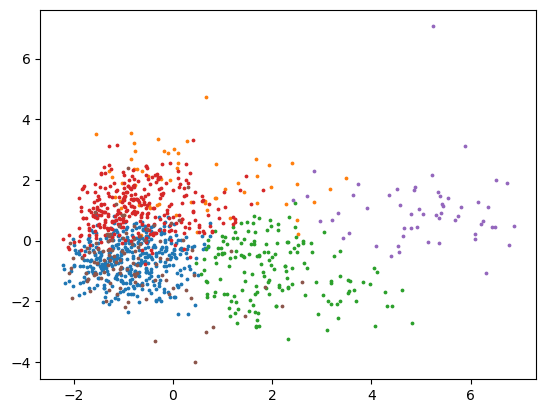

In [21]:
for c in np.unique(cluster_ids):
    plt.scatter(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], marker='.', s=12)

In [22]:
# i want to merge the labels with the original dataframe 
data["cluster"]=kmeans.labels_
data 

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
id,,,,,,,,,,,
6hZPajczr6rZV0BoiVaL9G,0.670,0.750,-4.895,0.1730,0.194000,0.000000,0.3690,0.526,77.045,229738,5
32s2XKjyXifmlGfU2tkT8y,0.631,0.743,-4.353,0.0285,0.123000,0.000000,0.1310,0.709,134.961,178187,0
7qNC8YKkXrzdKvcpL3xra6,0.395,0.988,-1.936,0.1630,0.000748,0.000536,0.2410,0.327,152.974,165280,3
5IvdLxVB8gwwcgnEkXSSW2,0.603,0.457,-5.384,0.2970,0.526000,0.000000,0.0905,0.455,73.724,242972,5
1iQ1B8aUtGMdsezQhCTgMQ,0.547,0.758,-4.780,0.0285,0.307000,0.000001,0.1860,0.308,87.928,195960,0
...,...,...,...,...,...,...,...,...,...,...,...
0Yc1PcFl82lC2w3Bu4fXGP,0.659,0.760,-2.564,0.1510,0.237000,0.000000,0.1480,0.742,119.849,175800,0
1ztFzSOgRMVTMOE8r0Jmlp,0.616,0.810,-6.190,0.3740,0.090200,0.000000,0.4250,0.703,121.024,176692,5
6CZpEC9kyyCJWWZKPnviXY,0.653,0.835,-5.769,0.2920,0.174000,0.000000,0.3060,0.515,135.041,233267,5


In [23]:
# and then I want to create dataframes with the songs from each of the clusters
C0_songs=pd.DataFrame(data.loc[data["cluster"]==0])
C1_songs=pd.DataFrame(data.loc[data["cluster"]==1])
C2_songs=pd.DataFrame(data.loc[data["cluster"]==2])
C3_songs=pd.DataFrame(data.loc[data["cluster"]==3])
C4_songs=pd.DataFrame(data.loc[data["cluster"]==4])
C5_songs=pd.DataFrame(data.loc[data["cluster"]==5])
len(C0_songs), len(C1_songs), len (C2_songs), len (C3_songs), len (C4_songs), len(C5_songs)

(400, 61, 163, 307, 56, 104)

In [24]:
#in order to extract the means of their song measures 
C0_means=pd.DataFrame(C0_songs.describe())
C0_means.drop(columns="cluster", inplace=True)
cluster_0_means=C0_means.iloc[1:2:1]
cluster_0_means

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
mean,0.668127,0.730795,-6.48315,0.066071,0.131869,0.034709,0.158809,0.65594,113.20242,238577.2175


In [25]:
C1_means=pd.DataFrame(C1_songs.describe())
C1_means.drop(columns="cluster", inplace=True)
cluster_1_means=C1_means.iloc[1:2:1]
cluster_1_means

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
mean,0.396115,0.696361,-9.168508,0.092802,0.271684,0.111098,0.790344,0.351956,121.203066,266726.344262


In [26]:
C2_means=pd.DataFrame(C2_songs.describe())
C2_means.drop(columns="cluster", inplace=True)
cluster_2_means=C2_means.iloc[1:2:1]
cluster_2_means

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
mean,0.560969,0.336998,-13.655571,0.056677,0.686348,0.239723,0.161261,0.511934,111.943687,195616.546012


In [27]:
C3_means=pd.DataFrame(C3_songs.describe())
C3_means.drop(columns="cluster", inplace=True)
cluster_3_means=C3_means.iloc[1:2:1]
cluster_3_means

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
mean,0.458261,0.823358,-5.978772,0.084046,0.053493,0.154218,0.188963,0.392988,142.836199,244505.697068


In [28]:
C4_means=pd.DataFrame(C4_songs.describe())
C4_means.drop(columns="cluster", inplace=True)
cluster_4_means=C4_means.iloc[1:2:1]
cluster_4_means

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
mean,0.196729,0.152574,-20.530232,0.041275,0.872437,0.65886,0.151614,0.100532,92.112536,476834.696429


In [29]:
C5_means=pd.DataFrame(C5_songs.describe())
C5_means.drop(columns="cluster", inplace=True)
cluster_5_means=C5_means.iloc[1:2:1]
cluster_5_means

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
mean,0.697404,0.67833,-7.187163,0.338865,0.21077,0.03528,0.267184,0.566907,113.682231,225784.076923


In [30]:
cluster_means_all= pd.concat([cluster_0_means, cluster_1_means, cluster_2_means, cluster_3_means, cluster_4_means, cluster_5_means])
cluster_means_all.reset_index(inplace=True)
cluster_means_all.drop(columns="index", inplace=True)
cluster_means_all

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.668127,0.730795,-6.483150,0.066071,0.131869,0.034709,0.158809,0.655940,113.202420,238577.217500
1,0.396115,0.696361,-9.168508,0.092802,0.271684,0.111098,0.790344,0.351956,121.203066,266726.344262
2,0.560969,0.336998,-13.655571,0.056677,0.686348,0.239723,0.161261,0.511934,111.943687,195616.546012
3,0.458261,0.823358,-5.978772,0.084046,0.053493,0.154218,0.188963,0.392988,142.836199,244505.697068
4,0.196729,0.152574,-20.530232,0.041275,0.872437,0.658860,0.151614,0.100532,92.112536,476834.696429
5,0.697404,0.678330,-7.187163,0.338865,0.210770,0.035280,0.267184,0.566907,113.682231,225784.076923


In [31]:
cluster_means_all.to_csv("cluster_means_all.csv", sep=';', index=False)

## get the input & compare

In [32]:
# finally we will compare the input song to the means of the different clusters and pick the one with the lowest difference to return a song. 
table_to_norm=pd.read_csv("cluster_means_all.csv", sep=';')
table_to_norm

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.668127,0.730795,-6.483150,0.066071,0.131869,0.034709,0.158809,0.655940,113.202420,238577.217500
1,0.396115,0.696361,-9.168508,0.092802,0.271684,0.111098,0.790344,0.351956,121.203066,266726.344262
2,0.560969,0.336998,-13.655571,0.056677,0.686348,0.239723,0.161261,0.511934,111.943687,195616.546012
3,0.458261,0.823358,-5.978772,0.084046,0.053493,0.154218,0.188963,0.392988,142.836199,244505.697068
4,0.196729,0.152574,-20.530232,0.041275,0.872437,0.658860,0.151614,0.100532,92.112536,476834.696429
5,0.697404,0.678330,-7.187163,0.338865,0.210770,0.035280,0.267184,0.566907,113.682231,225784.076923


In [33]:
from IPython.display import IFrame
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/" + track_id,
                  width="320",
                  height="80",
                  frameborder="0",
                  allowtransparency="true",
                  allow="encrypted-media"
                 )

def input_track():
    user_track = input('Enter a track name: ')
    result = sp.search(q=user_track, limit=10)
    track_id = result['tracks']['items'][0]['id']
    song_iframe = play_song(track_id)
    display(song_iframe)
    track_features = pd.DataFrame(sp.audio_features(track_id))
    track_features.drop(columns=['id', 'analysis_url', 'track_href', 'uri', 'type'], axis=1, inplace=True)
    return track_features

In [34]:
new_song2=input_track()

In [35]:
new_song2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.552,0.608,1,-9.786,0,0.0345,0.352,0,0.0533,0.637,112.367,162373,4


In [36]:
calculation= pd.concat([table_to_norm, new_song2])
measures_for_song= scaler.fit_transform(calculation)
measures_for_song

array([[ 1.02769854,  0.69829364,  0.81812016, -0.36460354, -0.84780333,
        -0.66983627, -0.41536234,  1.08494078, -0.15315353, -0.21206835,
                nan,         nan,         nan],
       [-0.67791492,  0.54375377,  0.25700711, -0.09359843, -0.34660138,
        -0.30837717,  2.36756241, -0.59489308,  0.42133919,  0.08560688,
                nan,         nan,         nan],
       [ 0.35577993, -1.06905263, -0.68057703, -0.45984999,  1.1398674 ,
         0.30024657, -0.40455471,  0.28915762, -0.24353785, -0.66637473,
                nan,         nan,         nan],
       [-0.28823918,  1.11371384,  0.92351134, -0.1823712 , -1.12876187,
        -0.10434392, -0.28248519, -0.36814682,  1.97472353, -0.14937506,
                nan,         nan,         nan],
       [-1.92813485, -1.8967356 , -2.11705665, -0.61599945,  1.80695019,
         2.28351594, -0.44706547, -1.98427379, -1.66752946,  2.30748939,
                nan,         nan,         nan],
       [ 1.2112713 ,  0.462832

In [37]:
len(measures_for_song)

7

In [38]:
def get_cluster():
    diff_clusters_dict={}
    for i in range (0,len(measures_for_song)-1):
        diff_clusters_dict[i]= abs(sum(measures_for_song[6]-measures_for_song[i]))
        selected=min(diff_clusters_dict, key=diff_clusters_dict.get)
    return selected


In [39]:
selected_cluster=get_cluster()
selected_cluster

0

In [40]:
# get a random song from the cluster identified above and play it. 
ids_dict={
    0:list(C0_songs.index), 
    1:list(C1_songs.index),
    2:list(C2_songs.index),
    3:list(C3_songs.index),
    4:list(C4_songs.index), 
    5:list(C5_songs.index)
    }

In [41]:
import random
recommended_track=random.choice(ids_dict[selected_cluster])

In [42]:
play_song(recommended_track)

### Improvements 
* add the mode column
* do a PCA before the kmeans
* identify ideal number of clusters (elbow)
* more songs 
* shorten code :) 